In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Data and exploratory data analysis 
https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [3]:
df.shape

(70692, 22)

In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
len(df)

70692

In [8]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

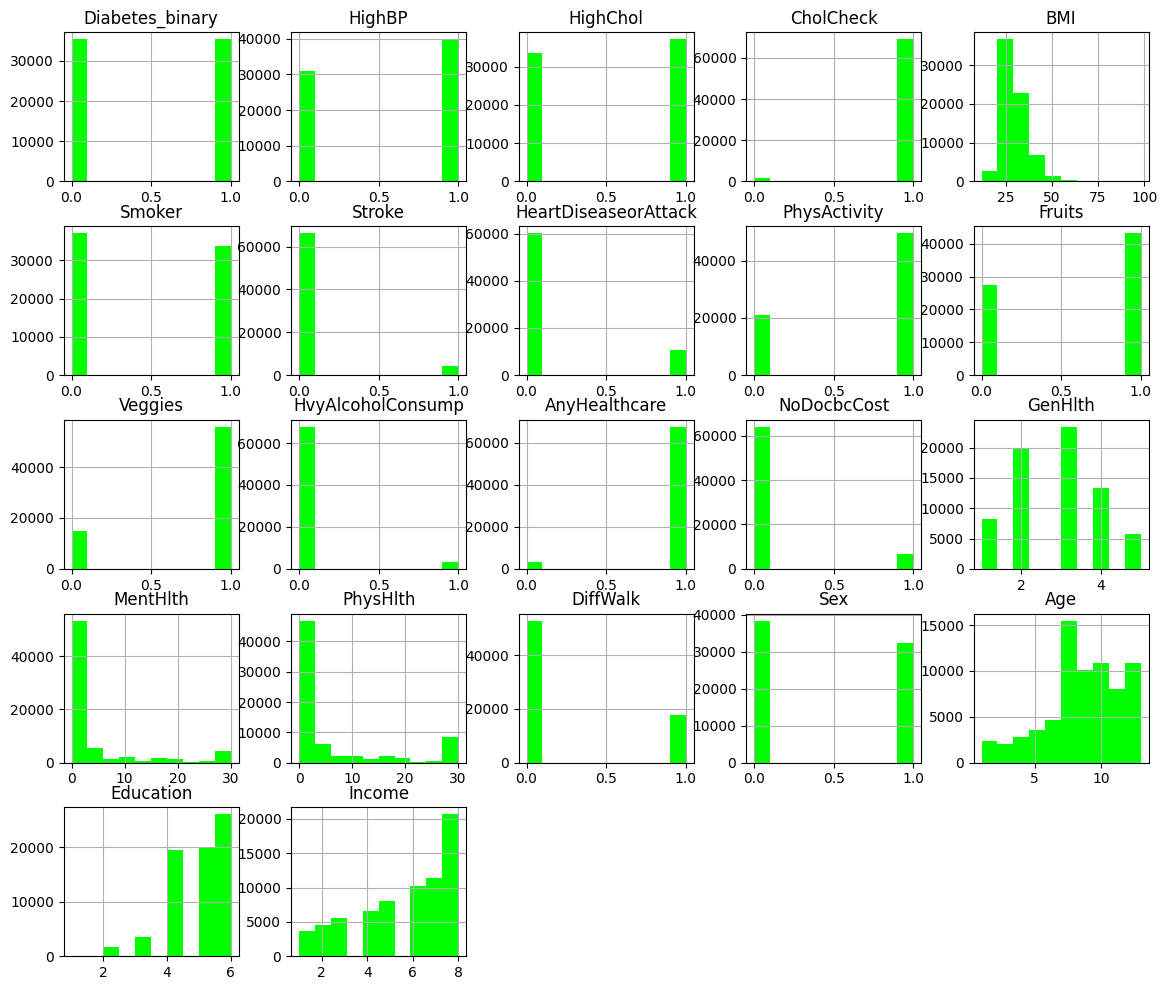

In [9]:
df.hist(figsize=(14, 12), color='lime')

In [10]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [11]:
categorical

[]

In [12]:
numerical

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [13]:
numerical = numerical[1:]

In [14]:
numerical

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [16]:
df.Diabetes_binary.value_counts(normalize=True)

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [17]:
df.Diabetes_binary.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

# Feature importance: diabetes rate and risk ratio

In [18]:
global_diabetes_binary = df.Diabetes_binary.mean()
global_diabetes_binary	

0.5

In [19]:
for c in numerical:
    print(c)
    df_group = df.groupby(c).Diabetes_binary.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_diabetes_binary
    df_group['risk'] = df_group['mean'] / global_diabetes_binary
    display(df_group)
    print()
    print()

HighBP


,mean,count,diff,risk
HighBP,,,,
0.0,0.283279,30860,-0.216721,0.566559
1.0,0.667905,39832,0.167905,1.335810




HighChol


,mean,count,diff,risk
HighChol,,,,
0.0,0.347759,33529,-0.152241,0.695517
1.0,0.637354,37163,0.137354,1.274709




CholCheck


,mean,count,diff,risk
CholCheck,,,,
0.0,0.137793,1749,-0.362207,0.275586
1.0,0.509189,68943,0.009189,1.018378




BMI


,mean,count,diff,risk
BMI,,,,
12.0,0.000000,1,-0.500000,0.000000
13.0,0.250000,8,-0.250000,0.500000
14.0,0.500000,8,0.000000,1.000000
15.0,0.400000,30,-0.100000,0.800000
16.0,0.285714,70,-0.214286,0.571429
...,...,...,...,...
87.0,0.692308,13,0.192308,1.384615
89.0,0.750000,4,0.250000,1.500000
92.0,0.555556,9,0.055556,1.111111




Smoker


,mean,count,diff,risk
Smoker,,,,
0.0,0.459077,37094,-0.040923,0.918154
1.0,0.545181,33598,0.045181,1.090363




Stroke


,mean,count,diff,risk
Stroke,,,,
0.0,0.483853,66297,-0.016147,0.967706
1.0,0.743572,4395,0.243572,1.487144




HeartDiseaseorAttack


,mean,count,diff,risk
HeartDiseaseorAttack,,,,
0.0,0.455953,60243,-0.044047,0.911907
1.0,0.753948,10449,0.253948,1.507895




PhysActivity


,mean,count,diff,risk
PhysActivity,,,,
0.0,0.622064,20993,0.122064,1.244129
1.0,0.448440,49699,-0.051560,0.896879




Fruits


,mean,count,diff,risk
Fruits,,,,
0.0,0.533943,27443,0.033943,1.067886
1.0,0.478462,43249,-0.021538,0.956924




Veggies


,mean,count,diff,risk
Veggies,,,,
0.0,0.576614,14932,0.076614,1.153228
1.0,0.479484,55760,-0.020516,0.958967




HvyAlcoholConsump


,mean,count,diff,risk
HvyAlcoholConsump,,,,
0.0,0.510019,67672,0.010019,1.020038
1.0,0.275497,3020,-0.224503,0.550993




AnyHealthcare


,mean,count,diff,risk
AnyHealthcare,,,,
0.0,0.446608,3184,-0.053392,0.893216
1.0,0.502518,67508,0.002518,1.005036




NoDocbcCost


,mean,count,diff,risk
NoDocbcCost,,,,
0.0,0.493404,64053,-0.006596,0.986808
1.0,0.563639,6639,0.063639,1.127278




GenHlth


,mean,count,diff,risk
GenHlth,,,,
1.0,0.137648,8282,-0.362352,0.275296
2.0,0.321105,19872,-0.178895,0.642210
3.0,0.574423,23427,0.074423,1.148845
4.0,0.735924,13303,0.235924,1.471848
5.0,0.788223,5808,0.288223,1.576446




MentHlth


,mean,count,diff,risk
MentHlth,,,,
0.0,0.486640,48091,-0.013360,0.973280
1.0,0.395904,2051,-0.104096,0.791809
2.0,0.461586,3267,-0.038414,0.923171
3.0,0.469751,1967,-0.030249,0.939502
4.0,0.498471,981,-0.001529,0.996942
5.0,0.485510,2519,-0.014490,0.971020
6.0,0.569444,288,0.069444,1.138889
7.0,0.490909,825,-0.009091,0.981818
8.0,0.555556,198,0.055556,1.111111




PhysHlth


,mean,count,diff,risk
PhysHlth,,,,
0.0,0.419391,39915,-0.080609,0.838782
1.0,0.416404,2853,-0.083596,0.832808
2.0,0.494393,4102,-0.005607,0.988786
3.0,0.528712,2438,0.028712,1.057424
4.0,0.554506,1376,0.054506,1.109012
5.0,0.563465,2332,0.063465,1.126930
6.0,0.630872,447,0.130872,1.261745
7.0,0.560332,1326,0.060332,1.120664
8.0,0.576087,276,0.076087,1.152174




DiffWalk


,mean,count,diff,risk
DiffWalk,,,,
0.0,0.420721,52826,-0.079279,0.841442
1.0,0.734412,17866,0.234412,1.468823




Sex


,mean,count,diff,risk
Sex,,,,
0.0,0.479628,38386,-0.020372,0.959256
1.0,0.524206,32306,0.024206,1.048412




Age


,mean,count,diff,risk
Age,,,,
1.0,0.079673,979,-0.420327,0.159346
2.0,0.100287,1396,-0.399713,0.200573
3.0,0.153245,2049,-0.346755,0.306491
4.0,0.224132,2793,-0.275868,0.448264
5.0,0.298580,3520,-0.201420,0.597159
6.0,0.374785,4648,-0.125215,0.749570
7.0,0.449360,6872,-0.050640,0.898719
8.0,0.495525,8603,-0.004475,0.991050
9.0,0.566950,10112,0.066950,1.133900




Education


,mean,count,diff,risk
Education,,,,
1.0,0.626667,75,0.126667,1.253333
2.0,0.718276,1647,0.218276,1.436551
3.0,0.666086,3447,0.166086,1.332173
4.0,0.568274,19473,0.068274,1.136548
5.0,0.516925,20030,0.016925,1.033849
6.0,0.399693,26020,-0.100307,0.799385




Income


,mean,count,diff,risk
Income,,,,
1.0,0.659928,3611,0.159928,1.319856
2.0,0.686083,4498,0.186083,1.372165
3.0,0.642073,5557,0.142073,1.284146
4.0,0.608892,6658,0.108892,1.217783
5.0,0.562297,8010,0.062297,1.124594
6.0,0.514338,10287,0.014338,1.028677
7.0,0.460832,11425,-0.039168,0.921663
8.0,0.348494,20646,-0.151506,0.696987


# Feature importance: mutual information

In [21]:
from sklearn.metrics import mutual_info_score

In [23]:
def mutual_info_diabetes_score(series):
    return mutual_info_score(series, df.Diabetes_binary)

In [24]:
mi = df[numerical].apply(mutual_info_diabetes_score)
mi.sort_values(ascending=False)

GenHlth                 0.092682
HighBP                  0.074794
BMI                     0.057299
Age                     0.046827
HighChol                0.042432
DiffWalk                0.038327
Income                  0.027702
PhysHlth                0.026642
HeartDiseaseorAttack    0.023294
Education               0.015269
PhysActivity            0.012684
Stroke                  0.008190
CholCheck               0.007394
MentHlth                0.004679
HvyAlcoholConsump       0.004656
Smoker                  0.003703
Veggies                 0.003154
Fruits                  0.001463
Sex                     0.000987
NoDocbcCost             0.000842
AnyHealthcare           0.000269
dtype: float64

# Feature importance: correlation

In [25]:
df[numerical].corrwith(df.Diabetes_binary) #.abs()

HighBP                  0.381516
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
AnyHealthcare           0.023191
NoDocbcCost             0.040977
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Sex                     0.044413
Age                     0.278738
Education              -0.170481
Income                 -0.224449
dtype: float64

In [26]:
# build a heat map of correlations
correlation = df[numerical].corr()
correlation.style.background_gradient(cmap='coolwarm')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009
Veggies,-0.066624,-0.042836,0.000349,-0.056528,-0.029926,-0.047601,-0.036315,0.149322,0.238605,1.000000,0.022090,0.029152,-0.037146,-0.115795,-0.052359,-0.066896,-0.084072,-0.052604,-0.018893,0.152512,0.154899


# Setting up the validation framework

In [27]:
from sklearn.model_selection import train_test_split

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [132]:
len(df_train), len(df_val), len(df_test)

(42414, 14139, 14139)

In [133]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [134]:
y_train = df_train.Diabetes_binary.values
y_val = df_val.Diabetes_binary.values
y_test = df_test.Diabetes_binary.values

del df_train['Diabetes_binary']
del df_val['Diabetes_binary']
del df_test['Diabetes_binary']

In [32]:
y_train

array([1., 0., 1., ..., 0., 0., 1.])

# One-hot encoding

In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [48]:
# https://stackoverflow.com/questions/22804009/saving-sgd-classifier-with-dictvectorizer-vocabulary
import pickle
# save DictVectorizer
with open('dv.pkl','wb') as f:
    pickle.dump(dv,f)

# Training logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(df_train)  # first we train
X_val = sc.transform(df_val)

In [67]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [48]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
y_pred = model.predict_proba(X_val) #[:, 1]

In [50]:
y_pred

array([[0.15064741, 0.84935259],
       [0.78388183, 0.21611817],
       [0.43791581, 0.56208419],
       ...,
       [0.84683231, 0.15316769],
       [0.06234544, 0.93765456],
       [0.30092993, 0.69907007]])

In [51]:
y_pred = model.predict_proba(X_val)[:, 1]

In [52]:
y_pred

array([0.84935259, 0.21611817, 0.56208419, ..., 0.15316769, 0.93765456,
       0.69907007])

In [53]:
roc_auc_score(y_val, y_pred)

0.8207262164726598

# Hyperparameter Tuning

In [57]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [79]:
def train(df_train, y_train, C=1.0):
    #dicts = df_train[categorical + numerical].to_dict(orient='records')

    #dv = DictVectorizer(sparse=False)
    #X_train = dv.fit_transform(dicts)
    sc = StandardScaler()
    X_train = sc.fit_transform(df_train[numerical])

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return sc, model

In [80]:
def predict(df, sc, model):
    #dicts = df[categorical + numerical].to_dict(orient='records')

    X = sc.transform(df[numerical])
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [81]:
n_splits = 5

for C in tqdm([0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.Diabetes_binary.values
        y_val = df_val.Diabetes_binary.values

        sc, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, sc, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 12%|█████▋                                       | 1/8 [00:00<00:02,  3.27it/s]

C=1e-06 0.806 +- 0.004


 25%|███████████▎                                 | 2/8 [00:00<00:01,  3.28it/s]

C=1e-05 0.809 +- 0.004


 38%|████████████████▉                            | 3/8 [00:01<00:01,  2.88it/s]

C=0.0001 0.818 +- 0.003


 50%|██████████████████████▌                      | 4/8 [00:01<00:01,  2.56it/s]

C=0.001 0.823 +- 0.003


 62%|████████████████████████████▏                | 5/8 [00:01<00:01,  2.39it/s]

C=0.01 0.824 +- 0.003


 75%|█████████████████████████████████▊           | 6/8 [00:02<00:00,  2.25it/s]

C=1 0.824 +- 0.003


 88%|███████████████████████████████████████▍     | 7/8 [00:02<00:00,  2.19it/s]

C=10 0.824 +- 0.003


100%|█████████████████████████████████████████████| 8/8 [00:03<00:00,  2.36it/s]

C=100 0.824 +- 0.003


C=1 leads to the best mean score

# Training and tuning RandomForestClassifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
sc = StandardScaler()
X_train = sc.fit_transform(df_train)  # first we train
X_val = sc.transform(df_val)

In [143]:
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, n, auc))

In [144]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [145]:
df_scores

,max_depth,n_estimators,auc
0,10,10,0.818174
1,10,20,0.820542
2,10,30,0.821548
3,10,40,0.822094
4,10,50,0.822418
...,...,...,...
75,25,160,0.808977
76,25,170,0.809218
77,25,180,0.809197
78,25,190,0.809547


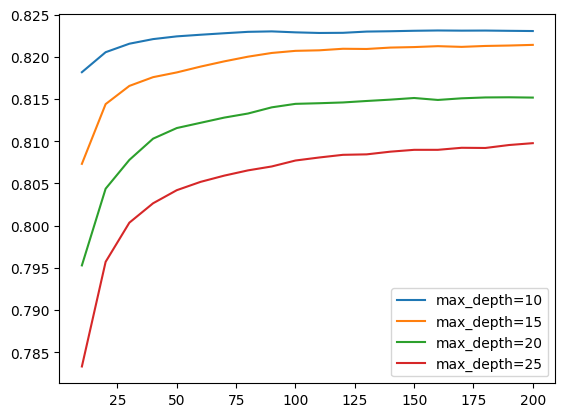

In [146]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

The accuracy of logistic regression and random forest models are almost the same. I will save and use logistic regression.

In [94]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(df_train)  # first we train
X_val = sc.transform(df_val)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [96]:
# save classifier
import pickle
with open('model_LR.pkl','wb') as f:
    pickle.dump(model,f)

# Using/testing the model

In [89]:
#dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [99]:
user = df_test[-1:]
user

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
14138,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [101]:
X_user = sc.transform(user)

In [102]:
model.predict_proba(X_user)[0, 1]

0.45425982617354854

In [103]:
y_test[-1:]

array([0.])

In [104]:
df_test.shape

(14139, 21)

In [105]:
y_test.shape

(14139,)

# SHAP: What features to keep?

In [106]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [108]:
# split the training dataset into X and y
X_train = df_train.drop(['Diabetes_binary'], axis=1)
y_train = df_train['Diabetes_binary']

X_test = df_test.drop(['Diabetes_binary'], axis=1)
y_test = df_test['Diabetes_binary']

In [109]:
# Define the column transformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical)]) #StandardScaler()
# Define the pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'BMI', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [110]:
import shap
X_sub = shap.sample(X_train, 1000)
ex = shap.Explainer(model.predict_proba, X_sub)

In [111]:
shap_values = ex(X_test.iloc[0:1000])

PermutationExplainer explainer: 1001it [00:26, 23.17it/s]                       


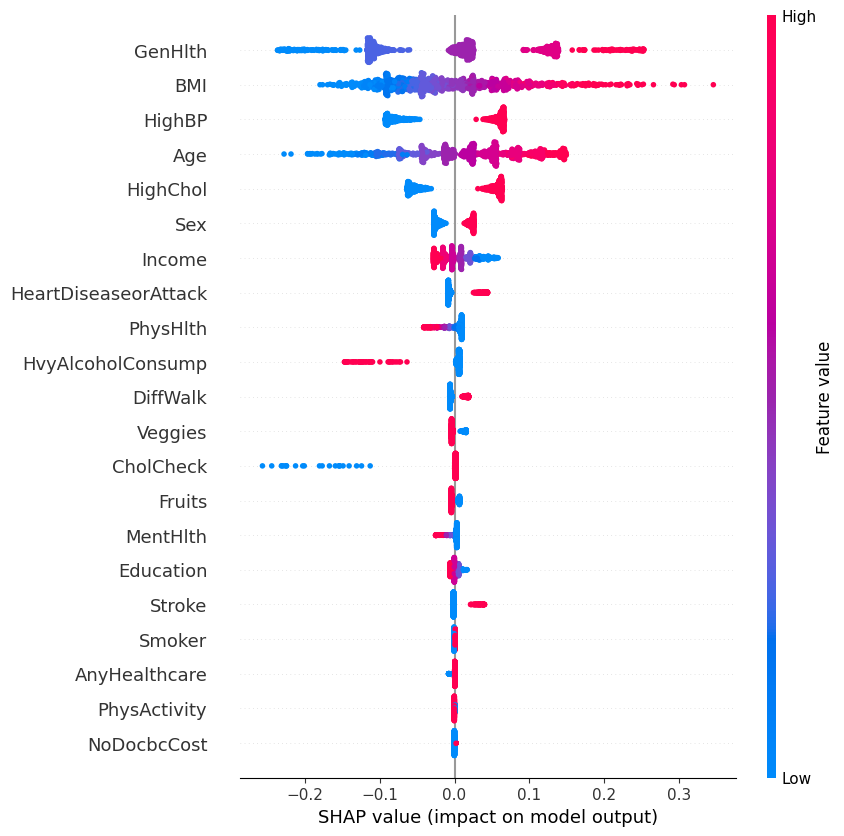

In [112]:
class_index=1
shap.plots.beeswarm(shap_values[:,:,class_index], max_display=30)

In [113]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [114]:
keep_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'Veggies',
                'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income']

In [115]:
df_user = pd.DataFrame(user)
model.predict_proba(df_user)[0, 1]

0.43766584137483705

In [116]:
shap_values_user = ex(df_user)

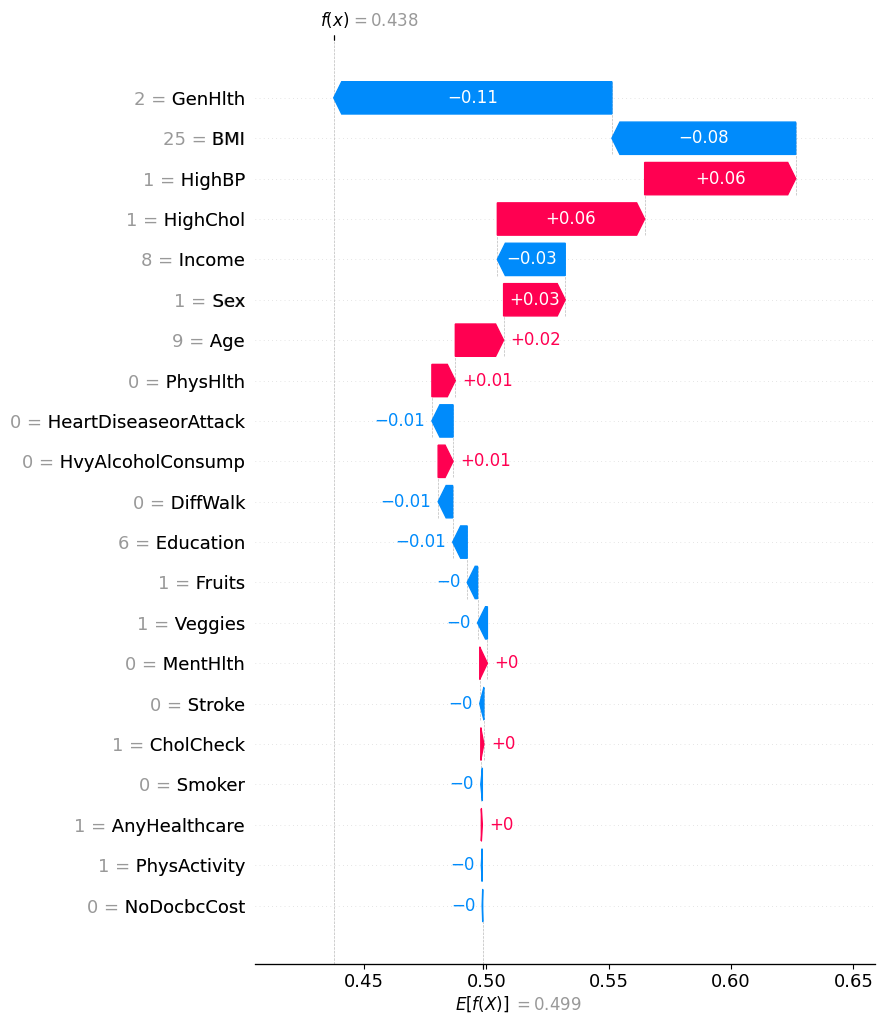

In [117]:
class_index = 1
data_index = 0
shap.plots.waterfall(shap_values_user[data_index,:,class_index], max_display=30)

In [118]:
# save classifier
with open('model_pipeline.pkl','wb') as f:
    pickle.dump(model,f)

In [119]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [178]:
df_new = df[keep_columns]

In [179]:
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=42)

In [180]:
# split the training dataset into X and y
X_train = df_train.drop(['Diabetes_binary'], axis=1)
y_train = df_train['Diabetes_binary']

X_test = df_test.drop(['Diabetes_binary'], axis=1)
y_test = df_test['Diabetes_binary']

In [181]:
keep_columns_nums = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'Veggies',
                     'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income']
# Define the column transformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), keep_columns_nums)]) #StandardScaler()
# Define the pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HighBP', 'HighChol', 'BMI',
                                                   'HeartDiseaseorAttack',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'GenHlth', 'DiffWalk', 'Sex',
                                                   'Age', 'Income'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [182]:
y_pred = model.predict_proba(X_test)[:, 1]

In [183]:
roc_auc_score(y_test, y_pred)

0.8233846450552403

The accuracy with the shortened dataset is still good!

# XGBoost

In [161]:
import xgboost as xgb

In [162]:
df_new.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack',
       'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
       'Income'],
      dtype='object')

In [163]:
df.columns[0]

'Diabetes_binary'

In [170]:
features = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'Veggies', 
            'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [171]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [172]:
y_pred = model.predict(dtest)

In [173]:
roc_auc_score(y_test, y_pred)

0.828034913164109

In [174]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [175]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [176]:
s = output.stdout

In [177]:
print(s[:200])

[0]	train-auc:0.81587	test-auc:0.81519
[5]	train-auc:0.83149	test-auc:0.82624
[10]	train-auc:0.83605	test-auc:0.82793
[15]	train-auc:0.83841	test-auc:0.82868
[20]	train-auc:0.84007	test-auc:0.82832
[2
